In [5]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

D:\Users\Alex\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

import torchvision

import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models

In [2]:
from functions_v2 import(import_folder_dataset,
                         Data,
                         calculate_IoU,
                         plot_loss_accuracy, 
                         save_model,
                         save_metrics,
                         make_predictions)

# Import Data

In [3]:
# Path of the files
train_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 3/Data/Train"
test_data_path = "D:/Personal/Alex/Uni/MS IA/2 Curso/Fall 2022/Computer Vision/Project/Project 3/Data/Test"

img_size = (256, 256) # (1024, 1024)

In [7]:
img_transform = transforms.Compose([transforms.ToPILImage(),
                                    transforms.Resize(img_size),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [8]:
train_data, train_mask, train_labels = import_folder_dataset(root_path = train_data_path, resized_side = img_size)#(1024,1024)

print("Dim of Data: ", train_data.shape)
print("Dim of Mask: ", train_mask.shape)
print("Dim of Lables: ", train_labels.shape)

100%|██████████| 800/800 [00:38<00:00, 20.72it/s]


Dim of Data:  (800, 256, 256, 3)
Dim of Mask:  (800, 256, 256, 3)
Dim of Lables:  (800, 256, 256)


In [9]:
# Split into Train, Validation
X_train, X_val, m_train, m_val, y_train, y_val = train_test_split(train_data, train_mask, train_labels, test_size=0.1, random_state=42)
print("Dim of Image Train: ", X_train.shape)
print("Dim of Mask Train: ", m_train.shape)
print("Dim of Lables Train: ", y_train.shape)


print("Dim of Image Validation: ", X_val.shape)
print("Dim of Mask Validation: ", m_val.shape)
print("Dim of Lables Validation: ", y_val.shape)

Dim of Image Train:  (720, 256, 256, 3)
Dim of Mask Train:  (720, 256, 256, 3)
Dim of Lables Train:  (720, 256, 256)
Dim of Image Validation:  (80, 256, 256, 3)
Dim of Mask Validation:  (80, 256, 256, 3)
Dim of Lables Validation:  (80, 256, 256)


In [10]:
# Create the dataset object
train_Dataset = Data(X_train, m_train, y_train, img_transform) # img_transform_2 img_transform
val_Dataset = Data(X_val, m_val, y_val, img_transform)

print("Train len: ",len(train_Dataset))
print("Val len: ",len(val_Dataset))

Train len:  720
Val len:  80


In [11]:
# Create the dataloaders
train_loader = DataLoader(
    train_Dataset, 
    batch_size=4,             
    shuffle=True)

valid_loader = DataLoader(
    val_Dataset, 
    batch_size=4,
    shuffle=False
    )

# Plot Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


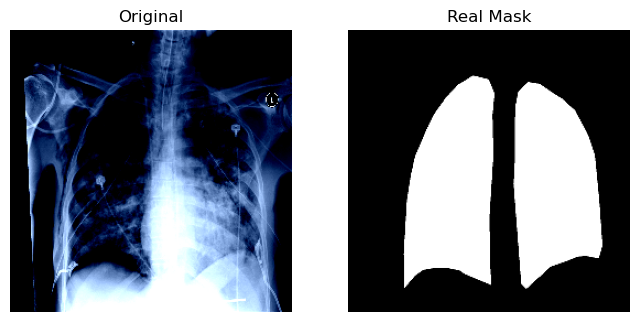

In [28]:
image_to_plot = 2

image, mask, y = val_Dataset[image_to_plot]

real_image = np.moveaxis(image.numpy(), 0,-1)
real_mask = mask

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))

ax1.imshow(real_image)
ax1.title.set_text("Original")
ax1.axis("off")

ax2.imshow(real_mask)
ax2.title.set_text("Real Mask")
ax2.axis("off")

plt.show()